In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and merge Excel files (adjust file paths as needed)
all_data = []
file_paths = ['255_s.xlsx', '259_s.xlsx', '261_s.xlsx', '285_s.xlsx', '287_s.xlsx',
              '219_student.xlsx', '220_student.xlsx', '221_student.xlsx', '222_student.xlsx', '223_student.xlsx']
for file in file_paths:
    df = pd.read_excel(file)
    df["Source_File"] = file
    all_data.append(df)
df_combined = pd.concat(all_data, ignore_index=True)
df_combined.columns = df_combined.columns.str.strip()

# Create "Label" column
if "Label" not in df_combined.columns:
    df_combined["Label"] = df_combined["Member"].apply(lambda x: 1 if x == "Student" else 0)

# Select numerical column
X = df_combined[["Start time"]].values
y = df_combined["Label"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model_one_feature = LinearRegression().fit(X_train, y_train)

# Output
print("\n✅ Model Coefficient:", model_one_feature.coef_)
print("✅ Model Intercept:", model_one_feature.intercept_)




✅ Model Coefficient: [-0.00040665]
✅ Model Intercept: 0.6155893715071148


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Predictions
y_train_pred = model_one_feature.predict(X_train)
y_test_pred = model_one_feature.predict(X_test)

# Compute metrics
def compute_metrics(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "R2 Score": r2_score(y_true, y_pred)
    }

print("\n📊 Train Set Metrics:", compute_metrics(y_train, y_train_pred))
print("📊 Test Set Metrics:", compute_metrics(y_test, y_test_pred))


📊 Train Set Metrics: {'MSE': 0.24237441289136358, 'RMSE': 0.4923153591869378, 'MAPE': 1091557315581687.9, 'R2 Score': 0.03044127771633709}
📊 Test Set Metrics: {'MSE': 0.26216286846857784, 'RMSE': 0.5120184259072889, 'MAPE': 1206427194247857.8, 'R2 Score': -0.04967654862883175}


In [9]:
numerical_columns = ["Start time", "End time"]
X = df_combined[numerical_columns].values

y = df_combined["Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_all_features = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred = model_all_features.predict(X_train)
y_test_pred = model_all_features.predict(X_test)

# Output metrics
print("\n📊 Train Set Metrics (All Features):", compute_metrics(y_train, y_train_pred))
print("📊 Test Set Metrics (All Features):", compute_metrics(y_test, y_test_pred))


📊 Train Set Metrics (All Features): {'MSE': 0.23573619965113382, 'RMSE': 0.48552672393096324, 'MAPE': 1061661460906584.6, 'R2 Score': 0.05699580329791509}
📊 Test Set Metrics (All Features): {'MSE': 0.25025259322915927, 'RMSE': 0.5002525294580321, 'MAPE': 1196468941987669.5, 'R2 Score': -0.001988877679996559}


In [10]:
from sklearn.cluster import KMeans

# Perform K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

# Output
print("\n✅ K-Means Labels:", kmeans.labels_)
print("✅ K-Means Centers:\n", kmeans.cluster_centers_)


✅ K-Means Labels: [1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0]
✅ K-Means Centers:
 [[556.91005626 573.40458824]
 [182.60651466 193.87243256]]


In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute metrics
silhouette = silhouette_score(X_train, kmeans.labels_)
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
db_index = davies_bouldin_score(X_train, kmeans.labels_)

# Output
print("\n📊 Silhouette Score:", silhouette)
print("📊 Calinski-Harabasz Score:", ch_score)
print("📊 Davies-Bouldin Index:", db_index)


📊 Silhouette Score: 0.5667059132367658
📊 Calinski-Harabasz Score: 440.86230198472805
📊 Davies-Bouldin Index: 0.6287722177322452


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


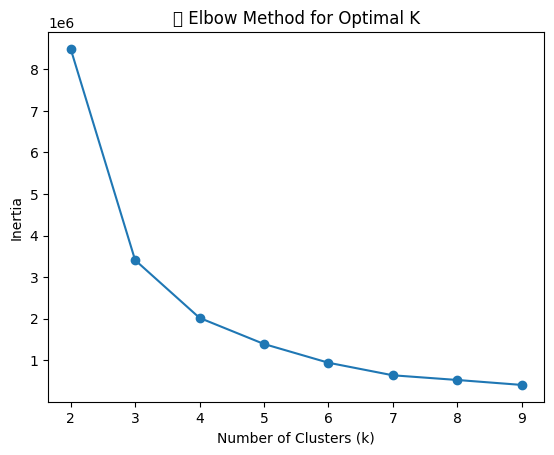

In [12]:
import matplotlib.pyplot as plt

# K-Means for different k
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

# Plot
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('📊 Elbow Method for Optimal K')
plt.show()